In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


excluding the PatientID as it wont't be useful in predicting the outcome label

In [3]:
df_new=df.iloc[:, 1:]
df_new.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
df_new.shape

(15000, 9)

# 

# Data Exploration

Plotting the Boxplot just to get the shape of distribution and some other useful insights 

In [5]:
features=df_new.columns
features=features.drop('Diabetic')
features


Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')

In [6]:
label=list(['Diabetic'])
label

['Diabetic']

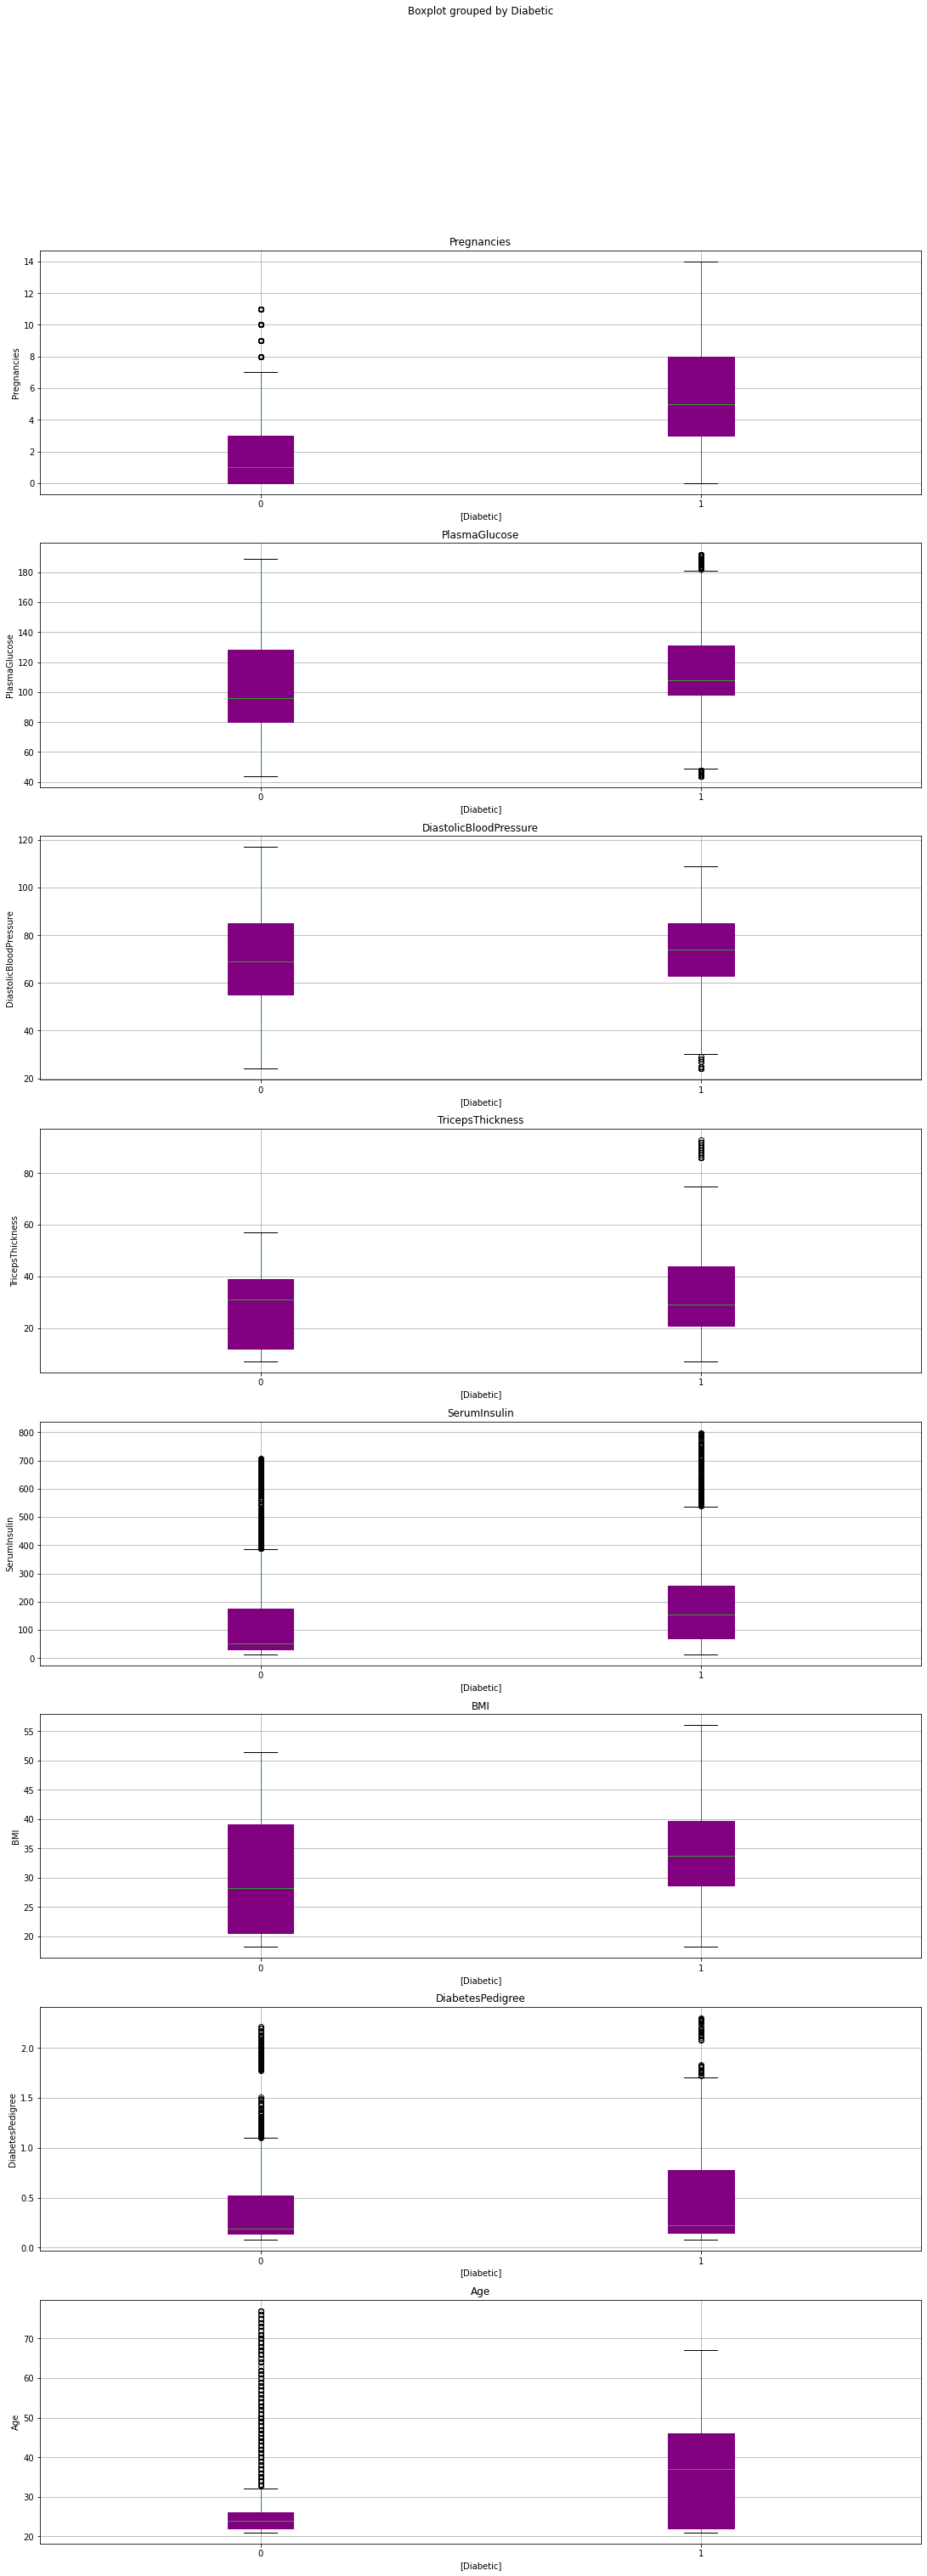

In [7]:
fig, ax= plt.subplots(8, 1, figsize=(18,50))

i=0

for feature in features:
    df_new.boxplot(column=feature, by=label, ax=ax[i] ,patch_artist=True,
            boxprops=dict(facecolor='purple', color='purple'))
    ax[i].set_ylabel(feature)
    i=i+1
    

~Looking at those above boxplot one can see there are heavy amount of outlier which can be further investigated.

~Plotting the histogram for numeric features.

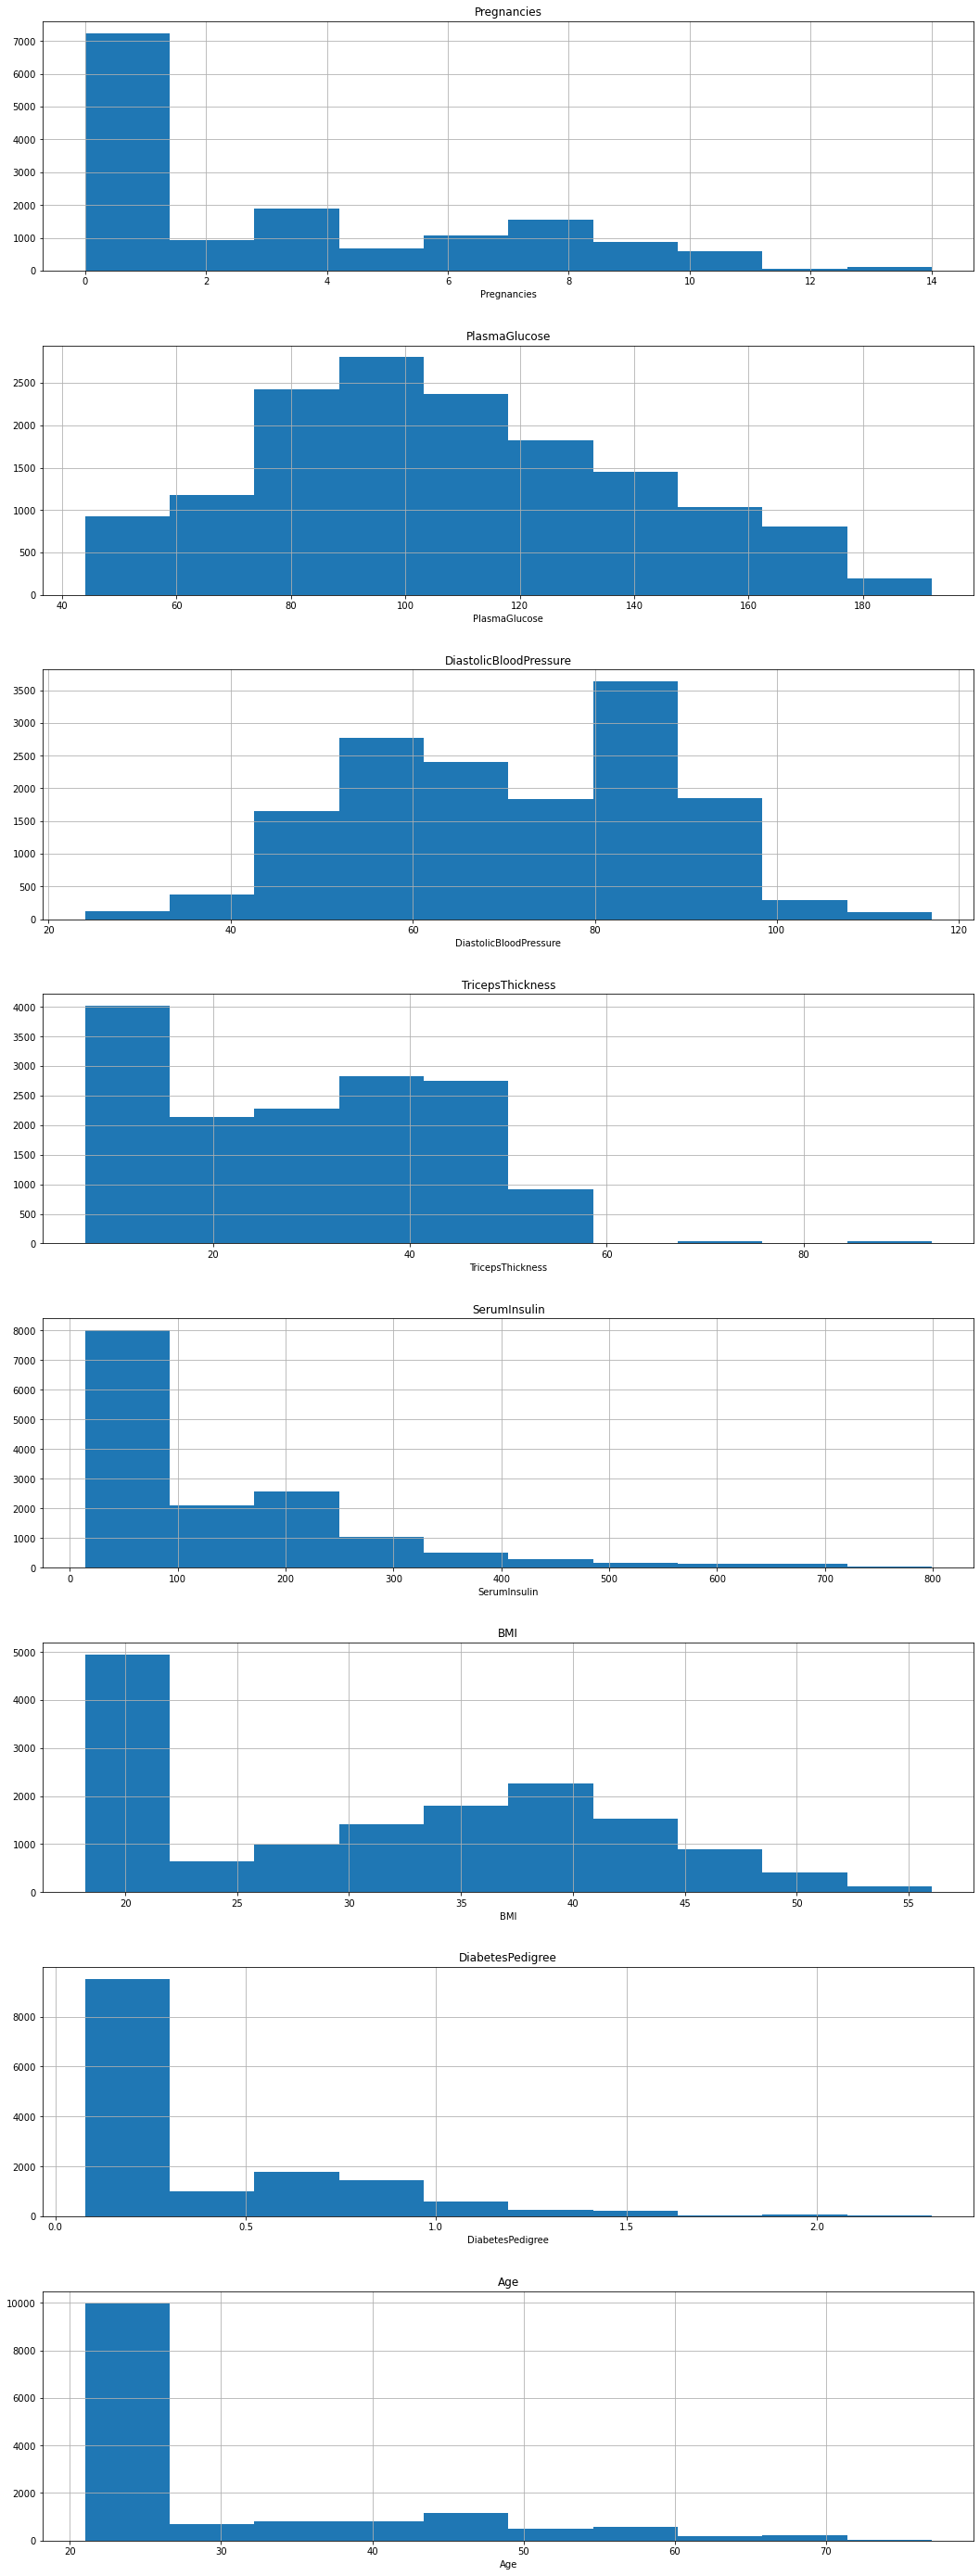

In [8]:
fig, ax= plt.subplots(8, 1, figsize=(18,50))

i=0

for feature in features:
    df_new.hist(feature, ax=ax[i])
    ax[i].set_xlabel(feature)
    i=i+1
    

In [9]:
preg_group=df.groupby('Pregnancies')['PatientID'].count()
preg_group.reset_index()

,Pregnancies,PatientID
0,0,4377
1,1,2864
2,2,939
3,3,1219
4,4,675
5,5,687
6,6,1070
7,7,895
8,8,645
9,9,881


In [10]:
df_clean=df_new.copy()

Removing the outliers

In [11]:
for feature in features:
    #temp=df_new.copy()
    q1=df_clean[feature].quantile(0.25)
    q3=df_clean[feature].quantile(0.75)
    IQR=q3-q1
  
    LL=q1-1.5*(IQR)
    UL=q3+1.5*(IQR)
 
    df_clean=df_clean[df_clean[feature]>LL]
    df_clean=df_clean[df_clean[feature]<UL]
    print("the LL is {}\nthe UL is {}\nthe IQR is {}\n The feature is  {}".format(LL,UL,IQR, feature))
    

the LL is -9.0
the UL is 15.0
the IQR is 6.0
 The feature is  Pregnancies
the LL is 16.5
the UL is 196.5
the IQR is 45.0
 The feature is  PlasmaGlucose
the LL is 17.5
the UL is 125.5
the IQR is 27.0
 The feature is  DiastolicBloodPressure
the LL is -24.0
the UL is 80.0
the IQR is 26.0
 The feature is  TricepsThickness
the LL is -195.0
the UL is 429.0
the IQR is 156.0
 The feature is  SerumInsulin
the LL is -5.808008164999997
the UL is 66.265103275
the IQR is 18.018277859999998
 The feature is  BMI
the LL is -0.5734844107500001
the UL is 1.3235402512500003
the IQR is 0.47425616550000005
 The feature is  DiabetesPedigree
the LL is 4.0
the UL is 52.0
the IQR is 12.0
 The feature is  Age


Plotting Histogram after removing outliers

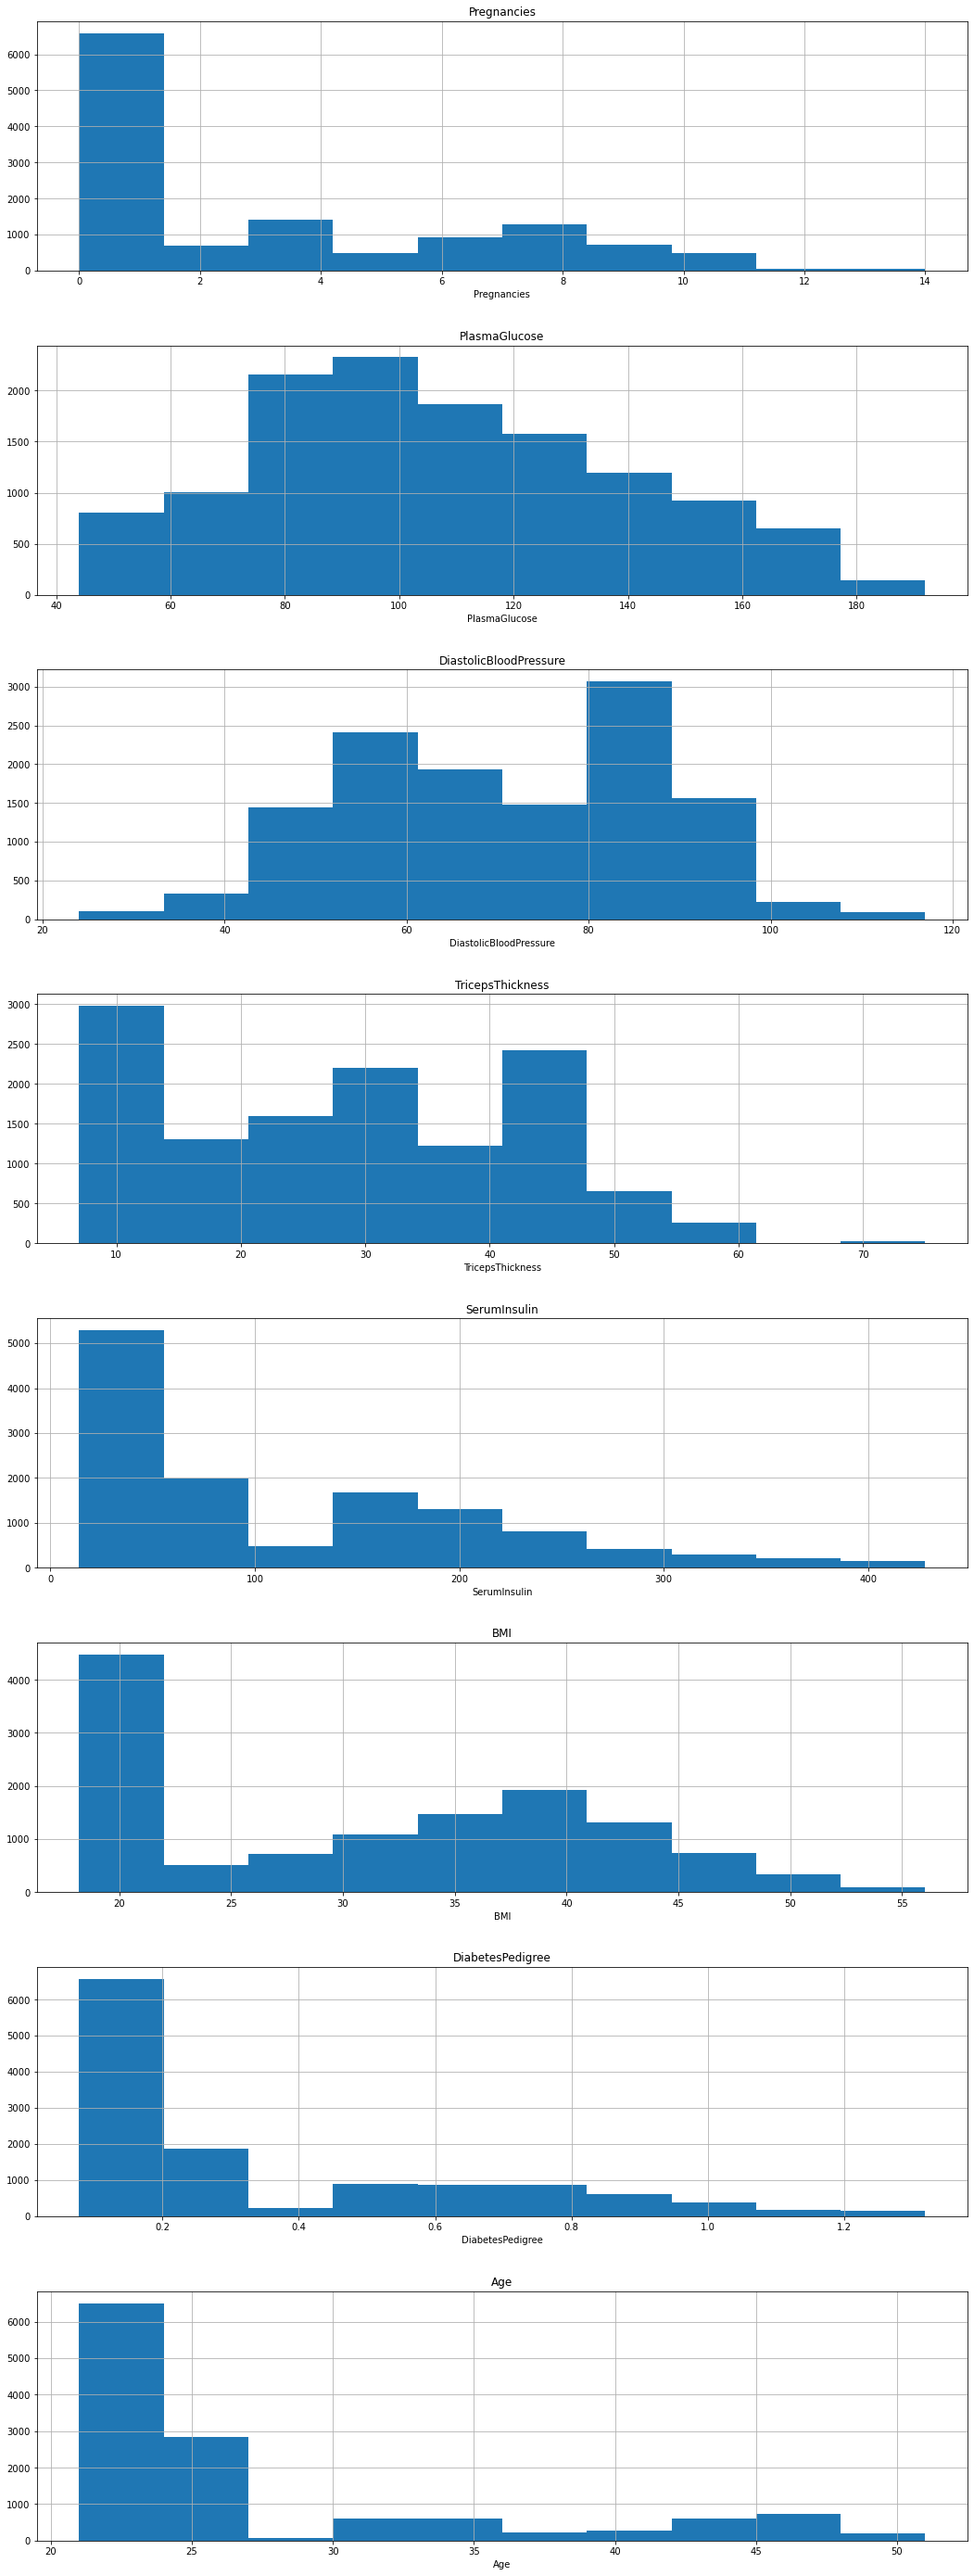

In [12]:
fig, ax= plt.subplots(8, 1, figsize=(18,50))

i=0

for feature in features:
    df_clean.hist(feature, ax=ax[i])
    ax[i].set_xlabel(feature)
    i=i+1
    

Plots still sees skewed but can't remove more data due to less amount

# Splitting and Training the Algorithm

In [13]:
from sklearn.model_selection import train_test_split
x=df_clean[features]
y=df_clean['Diabetic']
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [14]:
print("The the shape of train set is {}\nThe shape of test set is {}".format(x_train.shape, x_test.shape))

The the shape of train set is (10122, 8)
The shape of test set is (2531, 8)


In [15]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
clf = LogisticRegression(C=1/reg, solver="liblinear")
model=clf.fit(x_train, y_train)

In [16]:
from sklearn.metrics import accuracy_score
pred=model.predict(x_test)
print('Accuracy of our model is: ', accuracy_score(y_test, pred))

Accuracy of our model is:  0.8067957329118925


In [17]:
from sklearn. metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1831
           1       0.71      0.50      0.59       700

    accuracy                           0.81      2531
   macro avg       0.77      0.71      0.73      2531
weighted avg       0.80      0.81      0.80      2531



Looking at the Classification report, it can be seen that the recall for a diabetic person is quite low which raise a concern that our model needs to be fine tuned further.

In [18]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, pred)
print (cm)

[[1689  142]
 [ 347  353]]


In [19]:
y_scores = model.predict_proba(x_test)
print(y_scores)

[[0.81969538 0.18030462]
 [0.6566496  0.3433504 ]
 [0.17294059 0.82705941]
 ...
 [0.79492677 0.20507323]
 [0.84199793 0.15800207]
 [0.47827394 0.52172606]]


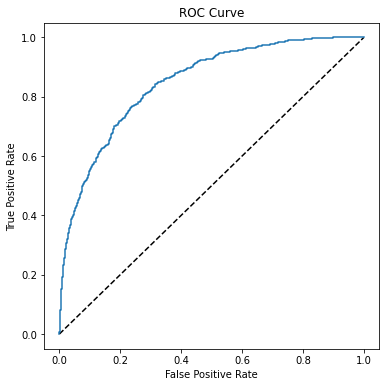

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8468354529140985


# Data Preprocessing & Creating Pipeline

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

In [25]:
df_clean.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [27]:
numeric_feature=[1,2,3,4,5]
numeric_transformer=Pipeline(steps=[('scaler',  StandardScaler())])

cat_feature=[0,7]
cat_transformer=Pipeline(steps=[('one_hot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feature),
        ('cat', cat_transformer, cat_feature)])

In [28]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])

In [29]:
model=pipeline.fit(x_train, y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5]),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])

In [30]:
pred_new=model.predict(x_test)

In [31]:
print('Accuracy of our model is: ', accuracy_score(y_test, pred_new))

Accuracy of our model is:  0.9055709205847491


In [41]:
from sklearn. metrics import classification_report

print(classification_report(y_test, pred_new))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1831
           1       0.86      0.79      0.82       700

    accuracy                           0.91      2531
   macro avg       0.89      0.87      0.88      2531
weighted avg       0.90      0.91      0.90      2531



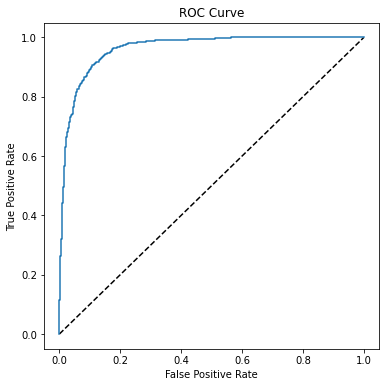

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores_new = model.predict_proba(x_test)
#print(y_scores)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_new[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Using Alternative Algorithm

In [36]:
from sklearn.ensemble import RandomForestClassifier

pipeline_tree = Pipeline(steps=[('preprocessor', preprocessor),
                           ('Tree', RandomForestClassifier(n_estimators=100))])

In [37]:
model_tree=pipeline_tree.fit(x_train,y_train)

In [38]:
pred_tree=model_tree.predict(x_test)

In [39]:
print('Accuracy of our model is: ', accuracy_score(y_test, pred_tree))

Accuracy of our model is:  0.9336230738838404


In [40]:
from sklearn. metrics import classification_report

print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1831
           1       0.92      0.84      0.87       700

    accuracy                           0.93      2531
   macro avg       0.93      0.90      0.91      2531
weighted avg       0.93      0.93      0.93      2531



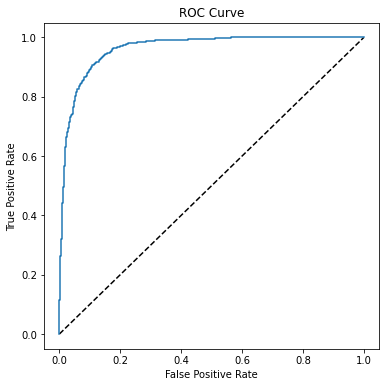

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores_new_tree = model.predict_proba(x_test)
#print(y_scores)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_new_tree[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [44]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model_tree, filename)

['./diabetes_model.pkl']